# Домашнее задание к лекции "Визуализация данных"

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

In [70]:
df = pd.read_csv(r'lecture_notebooks\2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [72]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


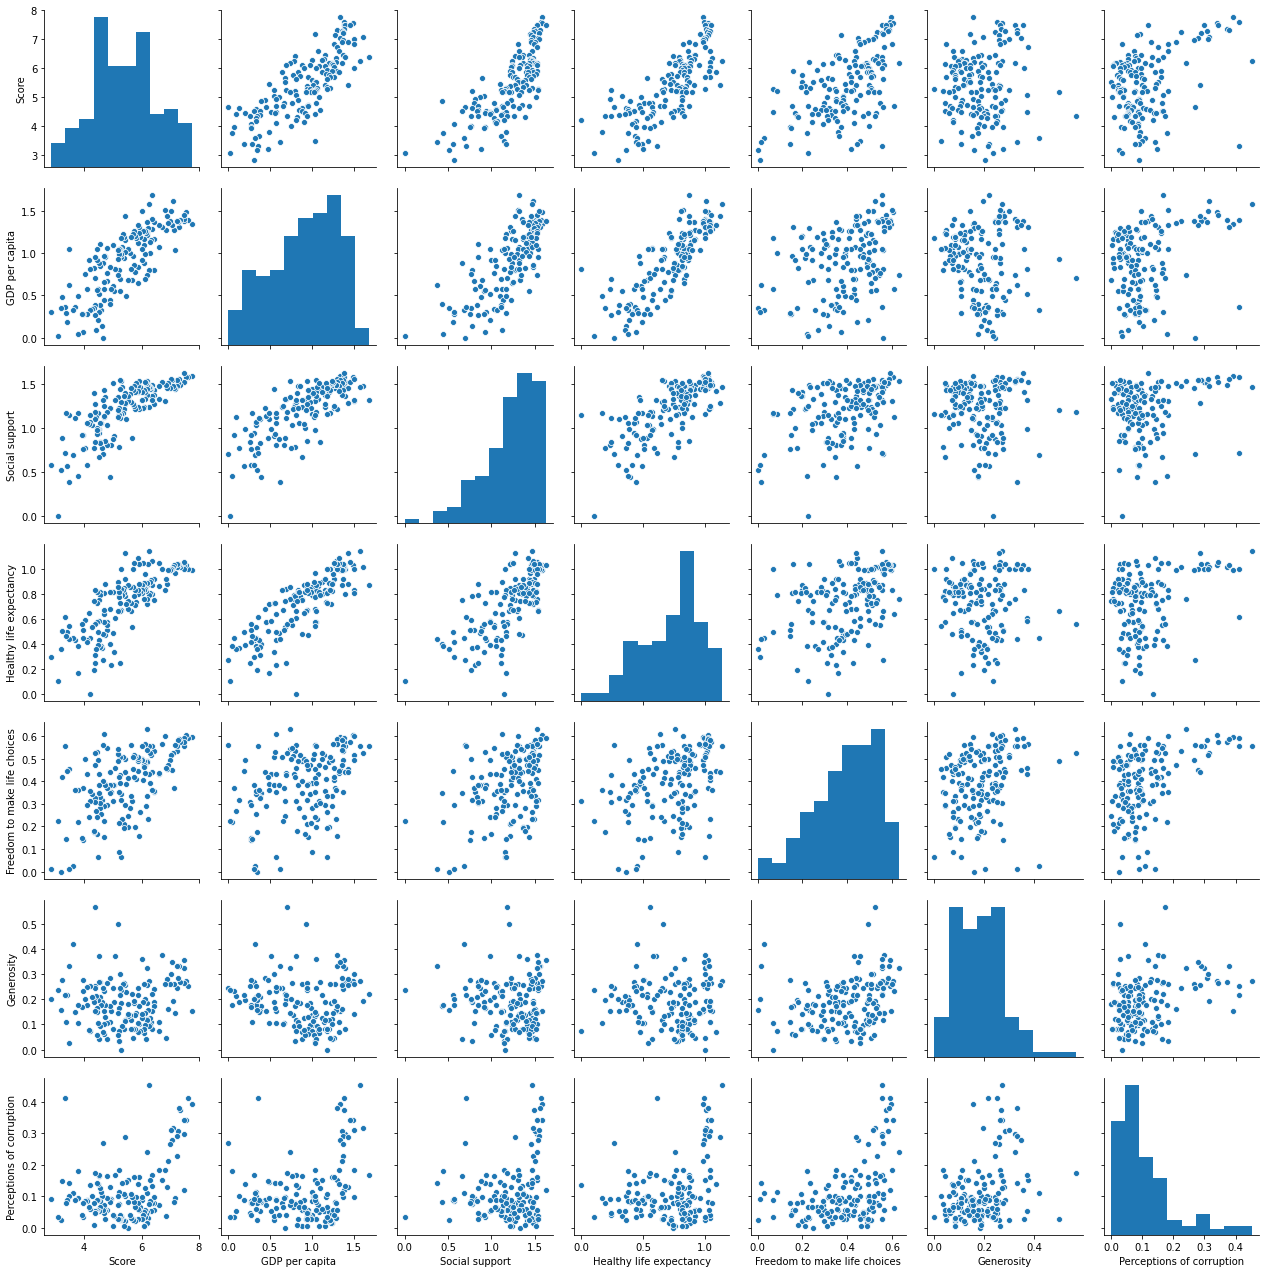

In [73]:
sns.pairplot(df[['Score', 
                 'GDP per capita', 
                 'Social support', 
                 'Healthy life expectancy', 
                 'Freedom to make life choices', 
                 'Generosity', 
                 'Perceptions of corruption']])

1. All the variables are numerical.
1. Some of the variables have a nearly normal distribution (Score, Generosity), others are heavily skewed (eg Social support, Perceptions of corruption). The latter should be log transformed before put into model.
1. Some explanatory variables have strong correlation with Score (GDP, Social support), others don't (Generosity)
1. There is collinearity between explanatory variables (eg GDP and Healthy Life Expectancy). GDP probably already includes prediction for a high life expectancy. The latter should not be included in the model.

### Response variable: score (numerical, continuos)

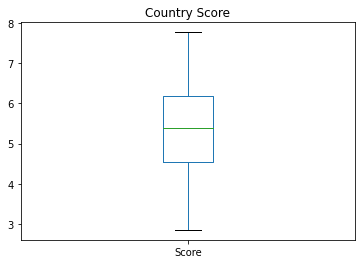

In [74]:
df.Score.plot(kind='box',
              title='Country Score')

Text(0.5, 1.0, 'Country Score')

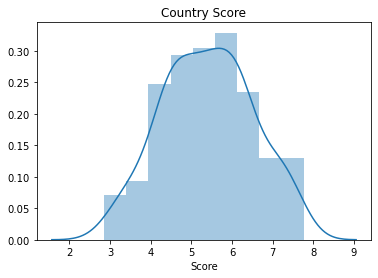

In [75]:
ax = sns.distplot(df.Score)
ax.set_title('Country Score')

Nearly normal distribution. No need to transform.

### Explanatory variable 1: GDP per capita

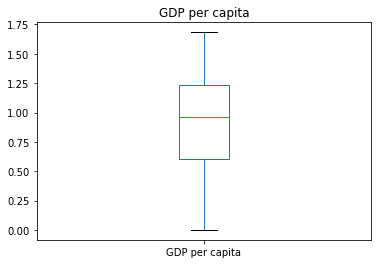

In [76]:
df['GDP per capita'].plot(kind='box',
              title='GDP per capita')

Text(0.5, 1.0, 'GDP per capita')

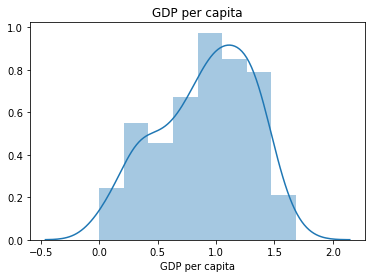

In [77]:
ax = sns.distplot(df['GDP per capita'])
ax.set_title('GDP per capita')

Nearly normal distribution. No outliers.

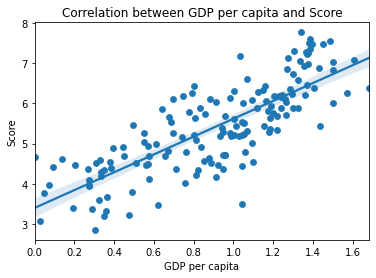

In [78]:
# df.plot(kind='scatter', 
#         x='GDP per capita', 
#         y='Score', 
#         title='Correlation between GDP per capita and Score')

df.plot.scatter(x = 'GDP per capita', y = 'Score', title='Correlation between GDP per capita and Score')
sns.regplot(x='GDP per capita', y='Score', data = df)

Strong correlation between GDP and Score.

### Explanatory variable 2: Perceptions of corruption

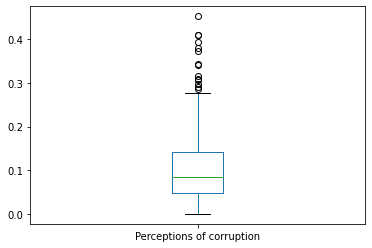

In [79]:
df['Perceptions of corruption'].plot(kind='box')

Text(0.5, 1.0, 'Perceptions of corruption')

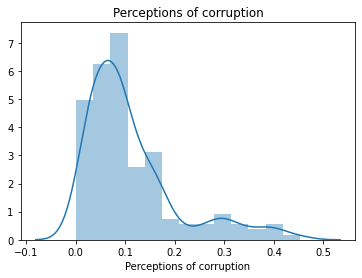

In [80]:
ax = sns.distplot(df['Perceptions of corruption'])
ax.set_title('Perceptions of corruption')

In [81]:
# outliers
q1 = df['Perceptions of corruption'].quantile(0.25)
q3 = df['Perceptions of corruption'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

-0.09437499999999997 0.28262499999999996


In [82]:
df[df['Perceptions of corruption'] > upper_bound]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316


Heavily right skewed. Requires log transformation. Cannot remove outliers as these countries stand out for a reason. The case of Rwanda should be studied further.

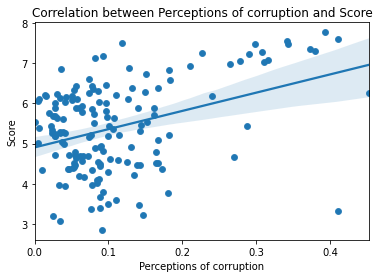

In [83]:
df.plot.scatter(x = 'Perceptions of corruption', 
                y = 'Score', 
                title='Correlation between Perceptions of corruption and Score')
sns.regplot(x='Perceptions of corruption', y='Score', data = df)

No significant correlation. Possibly a clearer correlation after log transformation.